In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [2]:

PATH = "D:\\ImageProcessing2\\breast-ultrasound-images-Split"


In [3]:
# del xtrain,xtest,xval,ytrain,ytest,yval

In [4]:
xtrain = []
ytrain = []
xtest = []
xval = []
ytest = []
yval = []
for i in os.listdir(PATH):
    if i =='test':
        for j in os.listdir(PATH+'\\'+i):
            for k in os.listdir(PATH+'\\'+i+'\\'+j):
                xtest.append(PATH+'\\'+i+'\\'+j+'\\'+k)
                ytest.append(j)
        print('not')
    elif i == 'train':
        for j in os.listdir(PATH+'\\'+i):
            print(j)
            for k in os.listdir(PATH+'\\'+i+'\\'+j):
                xtrain.append(PATH+'\\'+i+'\\'+j+'\\'+k)
                ytrain.append(j)
        print('not')
    else: 
        for j in os.listdir(PATH+'\\'+i):
            for k in os.listdir(PATH+'\\'+i+'\\'+j):
                xval.append(PATH+'\\'+i+'\\'+j+'\\'+k)
                yval.append(j)

not
benign
malignant
normal
not


In [21]:
train = []
test = []
val = []
for i in os.listdir(PATH):
    if i =='test':
        for j in os.listdir(PATH+'\\'+i):
            for k in os.listdir(PATH+'\\'+i+'\\'+j):
                test.append([PATH+'\\'+i+'\\'+j+'\\'+k,j])
        print('not')
    elif i == 'train':
        for j in os.listdir(PATH+'\\'+i):
            print(j)
            for k in os.listdir(PATH+'\\'+i+'\\'+j):
                train.append([PATH+'\\'+i+'\\'+j+'\\'+k,j])

        print('not')
    else: 
        for j in os.listdir(PATH+'\\'+i):
            for k in os.listdir(PATH+'\\'+i+'\\'+j):
                val.append([PATH+'\\'+i+'\\'+j+'\\'+k,j])


not
benign
malignant
normal
not


In [22]:
tra = []
tes = []
for i,j in train:
    tra.append(i)
    tes.append(j)

In [28]:
tess = []
ytess = []
for i,j in test:
    tess.append(i)
    ytess.append(j)

In [5]:
# # xtrain = []
# # ytrain = []
# # xtest = []
# # xval = []
# # ytest = []
# # yval = []
# for i in os.listdir(PATH):
#     if i =='test':
#         for j in os.listdir(PATH+'\\'+i):
#             for k in os.listdir(PATH+'\\'+i+'\\'+j):
#                 print(i,j,k)
#         break
#     elif i == 'train':
#         for j in os.listdir(PATH+'\\'+i):
#             print(j)
#             for k in os.listdir(PATH+'\\'+i+'\\'+j):
#                 print(i,j,k)
#         print('not')
#     else: 
#         for j in os.listdir(PATH+'\\'+i):
#             for k in os.listdir(PATH+'\\'+i+'\\'+j):
#                 print(i,j,k)

In [6]:
f = 0
for i in os.listdir(PATH):
    if i =='train':
        for j in os.listdir(PATH+'\\'+i):
            for k in os.listdir(PATH+'\\'+i+'\\'+j):
                # print(i,j,k)
                f+=1
print(f)

402


In [7]:
len(xtrain)

402

In [8]:
# print(sorted(xtrain))

In [9]:
train_data = {"xtrain":xtrain,'ytrain':ytrain}

In [10]:
df_train = pd.DataFrame(train_data)

In [11]:
df_train.head()

,xtrain,ytrain
0,D:\ImageProcessing2\breast-ultrasound-images-S...,benign
1,D:\ImageProcessing2\breast-ultrasound-images-S...,benign
2,D:\ImageProcessing2\breast-ultrasound-images-S...,benign
3,D:\ImageProcessing2\breast-ultrasound-images-S...,benign
4,D:\ImageProcessing2\breast-ultrasound-images-S...,benign


In [12]:
test_data = {"xtest":xtest,'ytest':ytest}

In [13]:
df_test = pd.DataFrame(test_data)

In [14]:
df_test.head()

,xtest,ytest
0,D:\ImageProcessing2\breast-ultrasound-images-S...,benign
1,D:\ImageProcessing2\breast-ultrasound-images-S...,benign
2,D:\ImageProcessing2\breast-ultrasound-images-S...,benign
3,D:\ImageProcessing2\breast-ultrasound-images-S...,benign
4,D:\ImageProcessing2\breast-ultrasound-images-S...,benign


In [23]:
ff = []
for i in tra:
    img = cv2.imread(i)
    resized_image = cv2.resize(img,(128,128))
    flattened_image = resized_image.flatten()

    ff.append(flattened_image)
    

In [29]:
tt = []
for i in tess:
    img = cv2.imread(i)
    resized_image = cv2.resize(img,(128,128))
    flattened_image = resized_image.flatten()

    tt.append(flattened_image)

In [24]:
ytr = tes

In [16]:
# tes = []
# for i in xtest:
#     img = cv2.imread(i)
#     resized_image = cv2.resize(img,(128,128))
#     flattened_image = resized_image.flatten()

#     X_train.append(flattened_image)

In [25]:
print(len(ff),len(ytr))

402 402


In [40]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(ff, ytr)

SVC(gamma='auto', kernel='linear')

In [41]:
ypred = svc.predict(tt)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
print(classification_report(ytess,ypred))

              precision    recall  f1-score   support

      benign       0.69      0.88      0.77        90
   malignant       0.73      0.45      0.56        42
      normal       0.72      0.50      0.59        26

    accuracy                           0.70       158
   macro avg       0.72      0.61      0.64       158
weighted avg       0.71      0.70      0.69       158



In [37]:
import seaborn as sns

<Axes: >

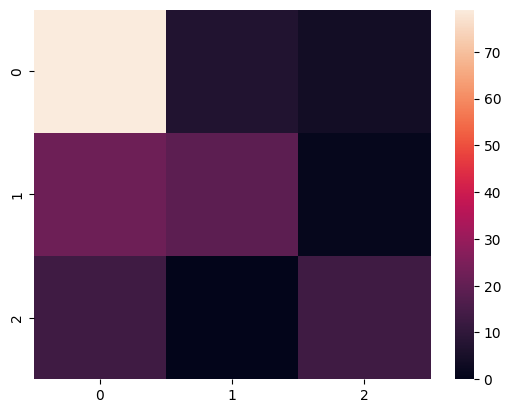

In [38]:
cm = confusion_matrix(ytest,ypred)
sns.heatmap(cm)

In [43]:
sv = SVC(kernel='rbf',gamma='auto')
sv.fit(ff, ytr)

SVC(gamma='auto')

In [44]:
ypredrbf = sv.predict(tt)

In [45]:
print(classification_report(ytess,ypredrbf))

              precision    recall  f1-score   support

      benign       0.57      1.00      0.73        90
   malignant       0.00      0.00      0.00        42
      normal       0.00      0.00      0.00        26

    accuracy                           0.57       158
   macro avg       0.19      0.33      0.24       158
weighted avg       0.32      0.57      0.41       158



c:\Users\77\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\77\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\77\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [46]:
svp = SVC(kernel='poly',gamma='auto')
svp.fit(ff, ytr)

SVC(gamma='auto', kernel='poly')

In [47]:
yp = svp.predict(tt)

In [48]:
print(classification_report(ytess,yp))

              precision    recall  f1-score   support

      benign       0.69      0.77      0.73        90
   malignant       0.62      0.48      0.54        42
      normal       0.58      0.58      0.58        26

    accuracy                           0.66       158
   macro avg       0.63      0.61      0.61       158
weighted avg       0.65      0.66      0.65       158

